# 2.4 Waveform read for Delta wavelet at top receiver

### This notebook is to plot the waveforms for the data of wavefields.
#### ...........................................................................................................................................................................................
#### Initially edited by Salvus group of ETH (https://salvus.io/)
#### Modified by Yingjie Gao (gaoyingjie@mail.iggcas.ac.cn;gaoyingjie12@mails.ucas.ac.cn) 
#### Institute of Geology and Geophysics, Chinase Academy of Sciences, Beijing, China, 100029
#### ...........................................................................................................................................................................................

In [1]:
%matplotlib inline

# This line helps with tab-completion of the simple_config objects.
# The IPython/Jupyter project default to a differnet inference based
# tab completion engine which unfortunately does not yet fully work
# with salvus_flow. This is completely optional and a convenience
# option.
%config Completer.use_jedi = False
# Standard Python packages
import toml
import numpy as np
import matplotlib.pyplot as plt

# Workflow management.
import salvus_flow.api

# Specific objects to aid in setting up simulations.
from pyasdf import ASDFDataSet
from salvus_mesh.simple_mesh import basic_mesh
import salvus_flow.simple_config as sc

import matplotlib.pyplot as plt
import numpy as np

import salvus_flow.simple_config as config
import salvus_toolbox.toolbox as st
import salvus_toolbox.toolbox_geotech as st_geo
from salvus_flow import api

In [2]:
# Read in data.
# rec_file = "output-custom-Delta-stf/receivers.h5"
rec_file = "/media/ygao/Elements/salvus data/Delta reciever/receivers.h5"
field = "gradient-of-displacement"
uxx, dt, extent = st.get_shotgather(rec_file, field=field, cmp=0, axis=1)
uxy, _, _ = st.get_shotgather(rec_file, field=field, cmp=1, axis=1)
uyx, _, _ = st.get_shotgather(rec_file, field=field, cmp=2, axis=1)
uyy, _, _ = st.get_shotgather(rec_file, field=field, cmp=3, axis=1)

# Read in data.
# rec_file = "output-custom-Delta-stf/receivers.h5"
rec_file = "/media/ygao/Elements/salvus data/Delta reciever/receivers.h5"
field = "velocity"
vx, dt, extent = st.get_shotgather(rec_file, field=field, cmp=0, axis=1)
vy, _, _ = st.get_shotgather(rec_file, field=field, cmp=1, axis=1)

# Read in data.
# rec_file = "output-custom-Delta-stf/receivers.h5"
rec_file = "/media/ygao/Elements/salvus data/Delta reciever/receivers.h5"
field = "acceleration"
vxt, dt, extent = st.get_shotgather(rec_file, field=field, cmp=0, axis=1)
vyt, _, _ = st.get_shotgather(rec_file, field=field, cmp=1, axis=1)

# Read in data.
# rec_file = "output-custom-Delta-stf/receivers.h5"
rec_file = "/media/ygao/Elements/salvus data/Delta reciever/receivers.h5"
field = "displacement"
ux, dt, extent = st.get_shotgather(rec_file, field=field, cmp=0, axis=1)
uy, _, _ = st.get_shotgather(rec_file, field=field, cmp=1, axis=1)

<IPython.core.display.Javascript object>


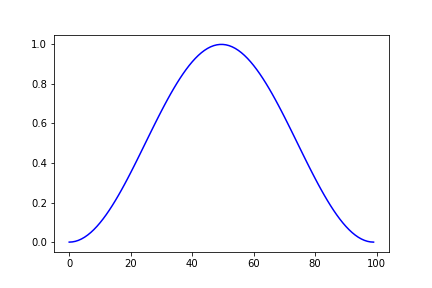

In [3]:
%matplotlib notebook
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

win_size = 100
## hanning window
hann_window = signal.hanning(win_size)

plt.figure()
plt.plot(hann_window, color='b', label='Amplitude')
plt.show()

<IPython.core.display.Javascript object>


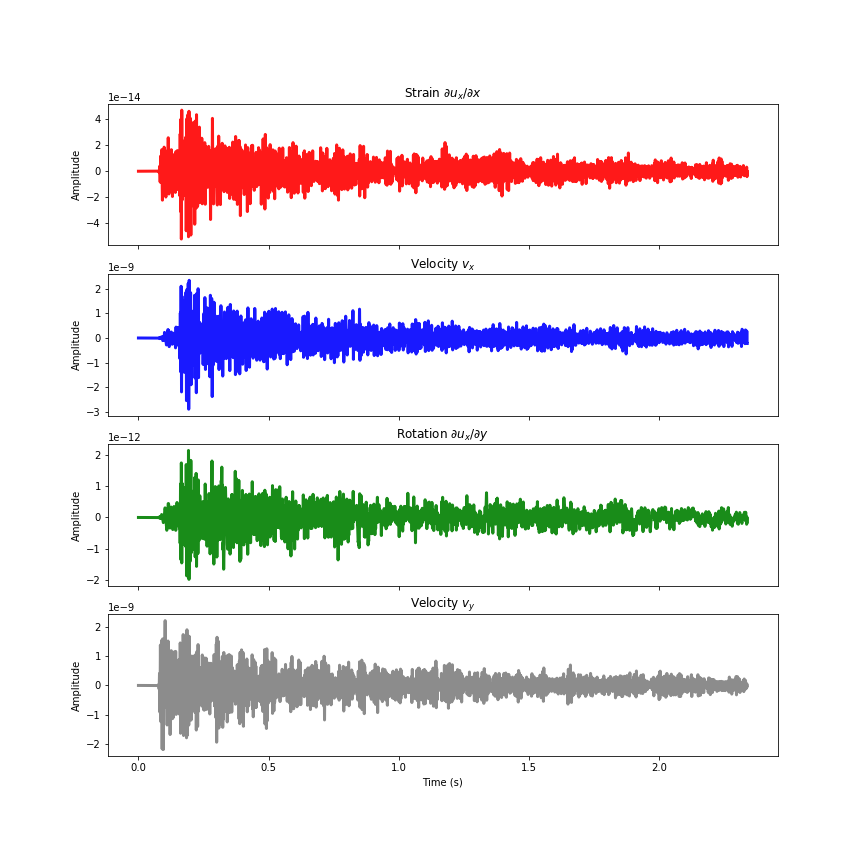

Text(0.5, 0, 'Time (s)')

In [4]:
f, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot the different fields.
nt,nx=np.shape(uxy)
nt
tt=np.linspace(0,(nt-1)*dt,nt)

ax[0].plot(tt[0:200000],uxx[0:200000,nx - 1],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[1].plot(tt[0:200000],vx[0:200000,nx - 1],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(tt[0:200000],uxy[0:200000,nx - 1],color="green",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[3].plot(tt[0:200000],vy[0:200000,nx - 1],color="grey",linewidth=3.0,linestyle="-",alpha=0.9)

# Label plots
ax[0].set_title(r"Strain $\partial u_x / \partial x$")
ax[1].set_title(r"Velocity $v_x$")
ax[2].set_title(r"Rotation $\partial u_x / \partial y$")
ax[3].set_title(r"Velocity $v_y$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel("Time (s)")

#plt.savefig('waveforms comparison.png')

<IPython.core.display.Javascript object>


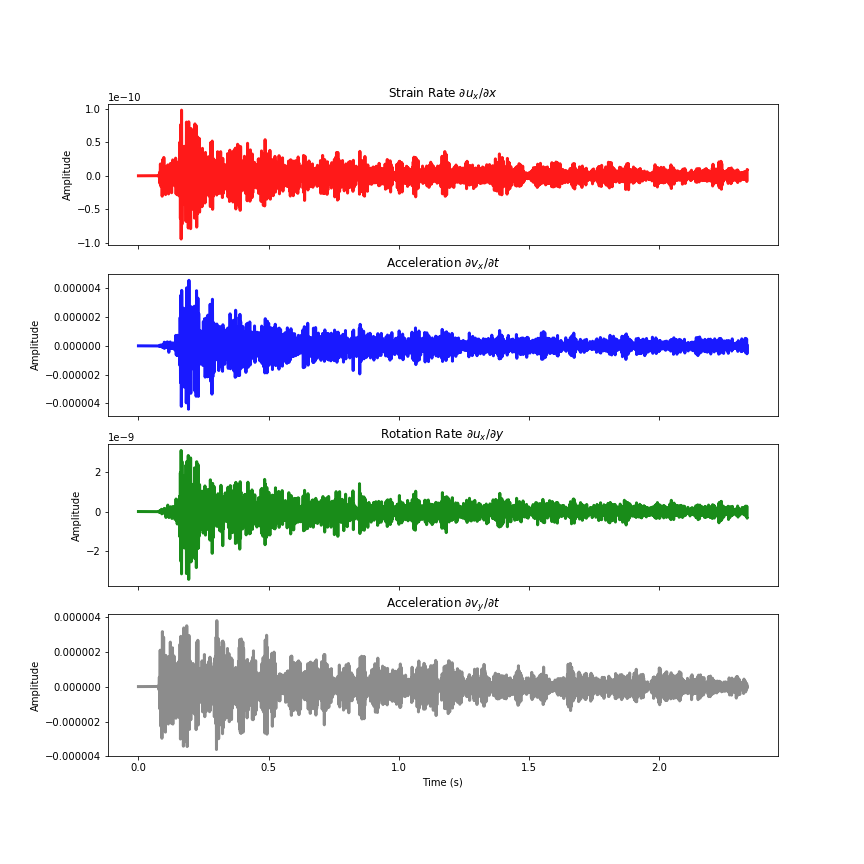

Text(0.5, 0, 'Time (s)')

In [5]:
import numpy as np

uxy_t=np.diff(uxy[:, nx-1])/dt
uxx_t=np.diff(uxx[:, nx-1])/dt

f, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot the different fields.
ax[0].plot(tt[0:200000],uxx_t[0:200000],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[1].plot(tt[0:200000],vxt[0:200000,nx - 1],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(tt[0:200000],uxy_t[0:200000],color="green",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[3].plot(tt[0:200000],vyt[0:200000,nx - 1],color="grey",linewidth=3.0,linestyle="-",alpha=0.9)

# Label plots
ax[0].set_title(r"Strain Rate $\partial u_x / \partial x$")
ax[1].set_title(r"Acceleration $\partial v_x / \partial t$")
ax[2].set_title(r"Rotation Rate $\partial u_x / \partial y$")
ax[3].set_title(r"Acceleration $\partial v_y / \partial t$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel("Time (s)")

<IPython.core.display.Javascript object>


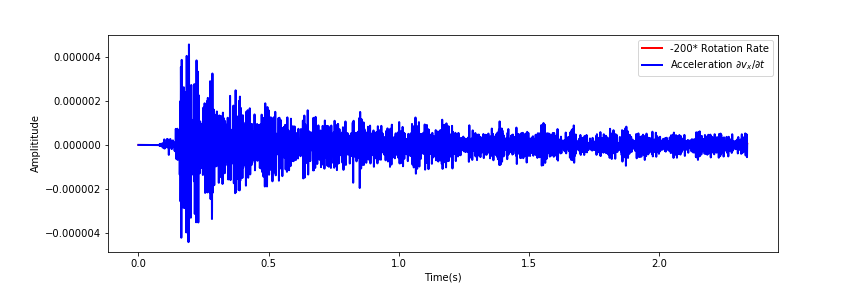

Text(0, 0.5, 'Amplititude')

In [6]:
plt.figure(figsize=(12,4)) 
l1,=plt.plot(tt[0:200000],-uxy_t[0:200000]*200,label="$sin(x)$",color="red",linewidth=2)    # time direvetive of rotation
l2,=plt.plot(tt[0:200000],vxt[0:200000, nx-1],label="$sin(x)$",color="blue",linewidth=2)    #acceleration
# 设置legend
plt.legend(handles = [l1, l2, ], labels = [r"-200* Rotation Rate", r"Acceleration $\partial v_x / \partial t$"], loc = 'best')
plt.xlabel("Time(s)")
plt.ylabel("Amplititude")

<IPython.core.display.Javascript object>


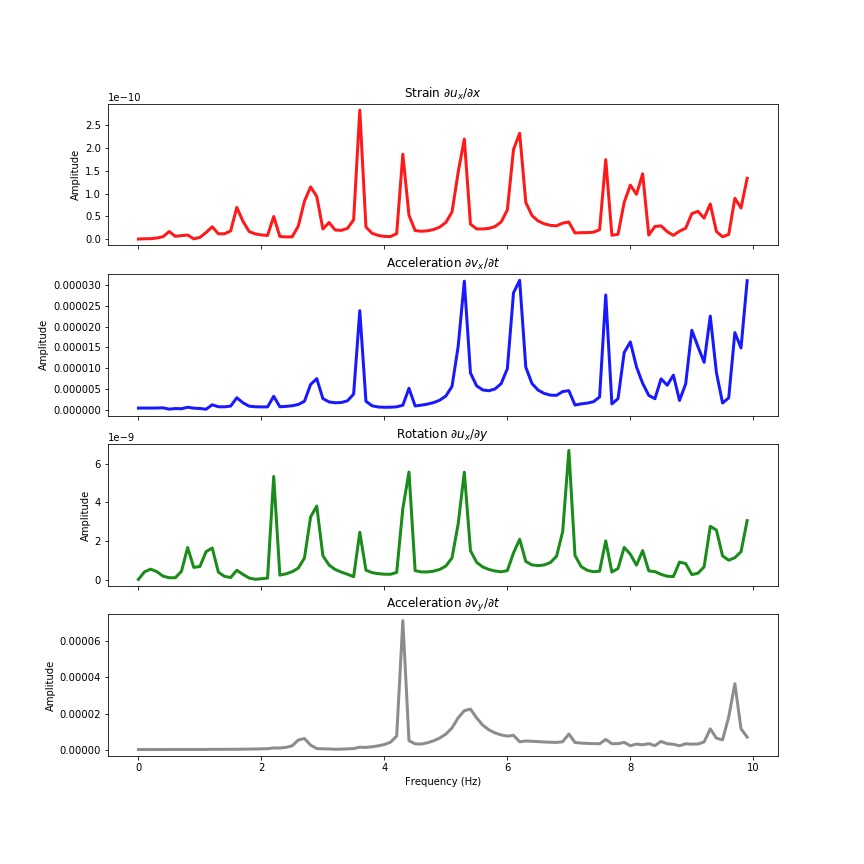

In [7]:
from scipy.fftpack import fft,ifft 

nt,nx=np.shape(uxy)

ff_uxy=fft(uxy[0:nt,2])
ff_uxx=fft(uxx[0:nt,2])
ff_vxt=fft(vxt[0:nt,2])
ff_vyt=fft(vyt[0:nt,2])

ff_vx=fft(vx[0:nt,2])
ff_vy=fft(vy[0:nt,2])

ff_ux=fft(ux[0:nt,2])
ff_uy=fft(uy[0:nt,2])

nt_taper=np.zeros(nt)
nt_taper[0:150]= 1.0

import scipy.signal as signal

win_size = 100
hann_window = signal.hanning(win_size)

nt_taper[101:150]=hann_window[51:100]

ff_uxy=ff_uxy*nt_taper
ff_uxx=ff_uxx*nt_taper
ff_vxt=ff_vxt*nt_taper
ff_vyt=ff_vyt*nt_taper
ff_vx=ff_vx*nt_taper
ff_vy=ff_vy*nt_taper
ff_ux=ff_ux*nt_taper
ff_uy=ff_uy*nt_taper



# calculate the frquency
freq=1/dt/(nt*dt)*tt
f, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
# Plot the different fields.
ax[0].plot(freq[0:100],abs(ff_uxx)[0:100],color="red",linewidth=3.0,linestyle="-",alpha=0.9)  
ax[1].plot(freq[0:100],abs(ff_vxt)[0:100],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(freq[0:100],abs(ff_uxy)[0:100],color="green",linewidth=3.0,linestyle="-",alpha=0.9)  
ax[3].plot(freq[0:100],abs(ff_vyt)[0:100],color="grey",linewidth=3.0,linestyle="-",alpha=0.9)


# Label plots
ax[0].set_title(r"Strain $\partial u_x / \partial x$")
ax[1].set_title(r"Acceleration $\partial v_x / \partial t$")
ax[2].set_title(r"Rotation $\partial u_x / \partial y$")
ax[3].set_title(r"Acceleration $\partial v_y / \partial t$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel("Frequency (Hz)")

plt.savefig('Top-Waveforms comparison spetral for Delta stf.png')

<IPython.core.display.Javascript object>


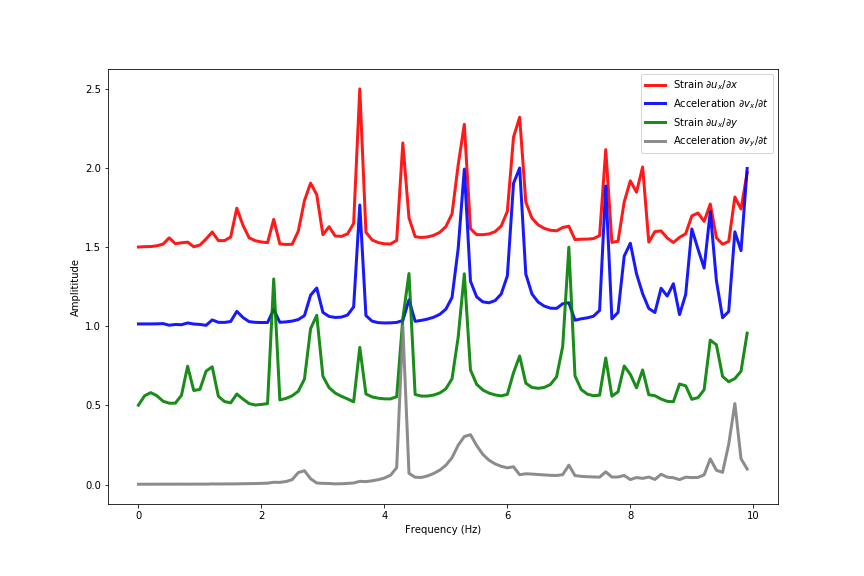

In [8]:
# Normalization
ff_uxx_norm=abs(ff_uxx)[0:100] / abs(ff_uxx)[0:100].max(axis=0)
ff_uxy_norm=abs(ff_uxy)[0:100] / abs(ff_uxy)[0:100].max(axis=0)
ff_vxt_norm=abs(ff_vxt)[0:100] / abs(ff_vxt)[0:100].max(axis=0)
ff_vyt_norm=abs(ff_vyt)[0:100] / abs(ff_vyt)[0:100].max(axis=0)

plt.figure(figsize=(12,8)) 
l1,=plt.plot(freq[0:100],ff_uxx_norm + 1.5,color="red",linewidth=3.0,linestyle="-",alpha=0.9)   
l2,=plt.plot(freq[0:100],ff_vxt_norm + 1.0,color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
l3,=plt.plot(freq[0:100],ff_uxy_norm + 0.5,color="green",linewidth=3.0,linestyle="-",alpha=0.9) 
l4,=plt.plot(freq[0:100],ff_vyt_norm,color="grey",linewidth=3.0,linestyle="-",alpha=0.9)

# 设置legend
plt.legend(handles = [l1, l2, l3, l4,], labels = [r"Strain $\partial u_x / \partial x$" \
                                              , r"Acceleration $\partial v_x / \partial t$" \
                                              , r"Strain $\partial u_x / \partial y$" \
                                              , r"Acceleration $\partial v_y / \partial t$"] \
           
        , loc = 'best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplititude")
plt.savefig('Top-Waveforms comparison spetral together for Delta stf.png')

<IPython.core.display.Javascript object>


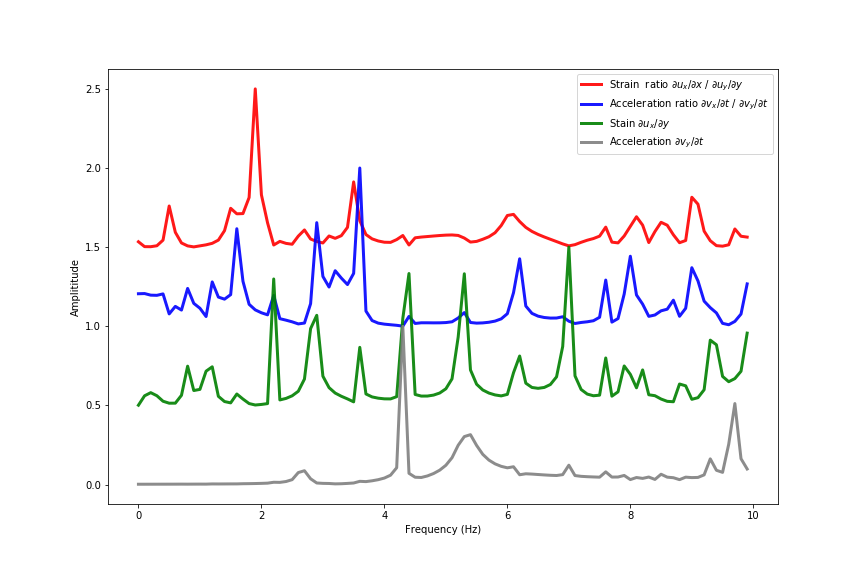

Text(0, 0.5, 'Amplititude')

In [9]:
# # Normalization
ratio_uxx_uxy=abs(ff_uxx)[0:100] / abs(ff_uxy)[0:100]
ratio_uxx_uxy_norm=ratio_uxx_uxy / ratio_uxx_uxy.max(axis=0)

ratio_vxt_vyt=abs(ff_vxt)[0:100] / abs(ff_vyt)[0:100]
ratio_vxt_vyt_norm=ratio_vxt_vyt / ratio_vxt_vyt.max(axis=0)

plt.figure(figsize=(12,8)) 
l1,=plt.plot(freq[0:100],ratio_uxx_uxy_norm + 1.5,color="red",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
l2,=plt.plot(freq[0:100],ratio_vxt_vyt_norm + 1.0,color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
l3,=plt.plot(freq[0:100],ff_uxy_norm + 0.5,color="green",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
l4,=plt.plot(freq[0:100],ff_vyt_norm,color="grey",linewidth=3.0,linestyle="-",alpha=0.9)

# 设置legend
plt.legend(handles = [l1, l2, l3, l4,], labels = [r"Strain  ratio $\partial u_x / \partial x$ / $\partial u_y / \partial y$" \
                                              , r"Acceleration ratio $\partial v_x / \partial t$ / $\partial v_y / \partial t$" \
                                              , r"Stain $\partial u_x / \partial y$" \
                                              , r"Acceleration $\partial v_y / \partial t$"] \
           
        , loc = 'best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplititude")
# plt.savefig('Top-Waveforms comparison spetral together for Delta stf.png')

<IPython.core.display.Javascript object>


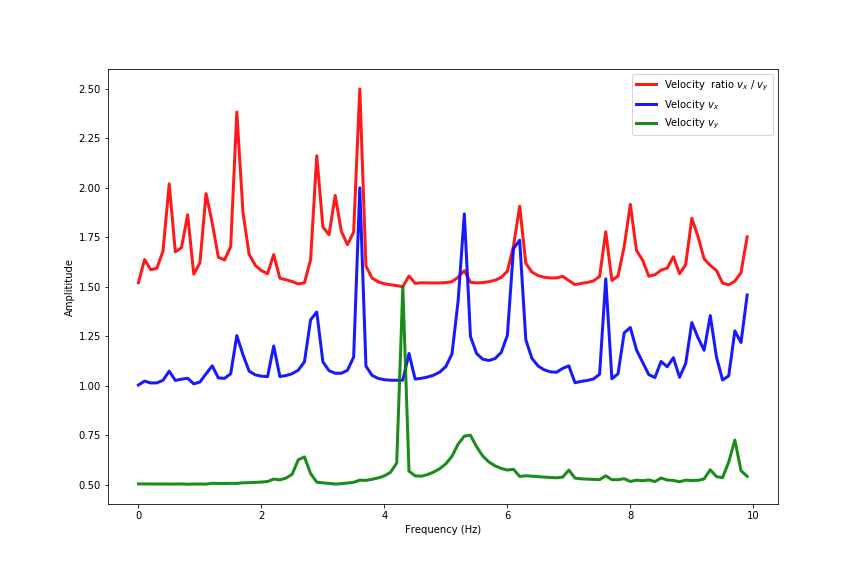

Text(0, 0.5, 'Amplititude')

In [10]:
# Normalization
ff_vx_norm=abs(ff_vx)[0:100] / abs(ff_vx)[0:100].max(axis=0)
ff_vy_norm=abs(ff_vy)[0:100] / abs(ff_vy)[0:100].max(axis=0)
ratio_vx_vy=abs(ff_vx)[0:100] / abs(ff_vy)[0:100]
ratio_vx_vy_norm=ratio_vx_vy / ratio_vx_vy.max(axis=0)

plt.figure(figsize=(12,8)) 
l1,=plt.plot(freq[0:100],ratio_vx_vy_norm + 1.5,color="red",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
l2,=plt.plot(freq[0:100],ff_vx_norm + 1.0,color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
l3,=plt.plot(freq[0:100],ff_vy_norm + 0.5,color="green",linewidth=3.0,linestyle="-",alpha=0.9)   #20s

# legend
plt.legend(handles = [l1, l2, l3,], labels = [r"Velocity  ratio $v_x$ / $v_y$" \
                                              , r"Velocity $ v_x $" \
                                              , r"Velocity $ v_y $" ]\
                                                         
        , loc = 'best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplititude")
# plt.savefig('Top-Waveforms comparison spetral together for Delta stf.png')

<IPython.core.display.Javascript object>


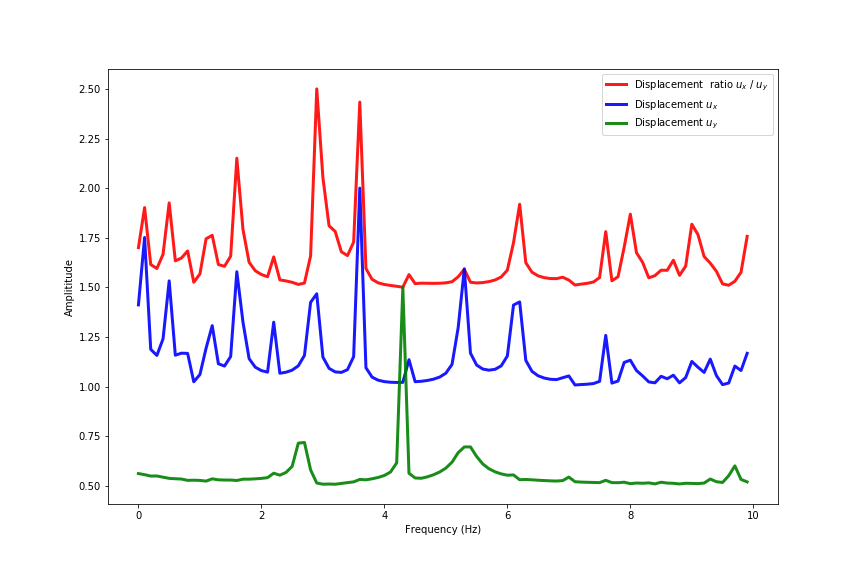

Text(0, 0.5, 'Amplititude')

In [11]:
# Normalization
ff_ux_norm=abs(ff_ux)[0:100] / abs(ff_ux)[0:100].max(axis=0)
ff_uy_norm=abs(ff_uy)[0:100] / abs(ff_uy)[0:100].max(axis=0)
ratio_ux_uy=abs(ff_ux)[0:100] / abs(ff_uy)[0:100]
ratio_ux_uy_norm=ratio_ux_uy / ratio_ux_uy.max(axis=0)

plt.figure(figsize=(12,8)) 
l1,=plt.plot(freq[0:100],ratio_ux_uy_norm + 1.5,color="red",linewidth=3.0,linestyle="-",alpha=0.9)   
l2,=plt.plot(freq[0:100],ff_ux_norm + 1.0,color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
l3,=plt.plot(freq[0:100],ff_uy_norm + 0.5,color="green",linewidth=3.0,linestyle="-",alpha=0.9)   

# 设置legend
plt.legend(handles = [l1, l2, l3,], labels = [r"Displacement  ratio $u_x$ / $u_y$" \
                                              , r"Displacement $ u_x $" \
                                              , r"Displacement $ u_y $" ]\
                                                         
        , loc = 'best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplititude")
# plt.savefig('Top-Waveforms comparison spetral together for Delta stf.png')

<IPython.core.display.Javascript object>


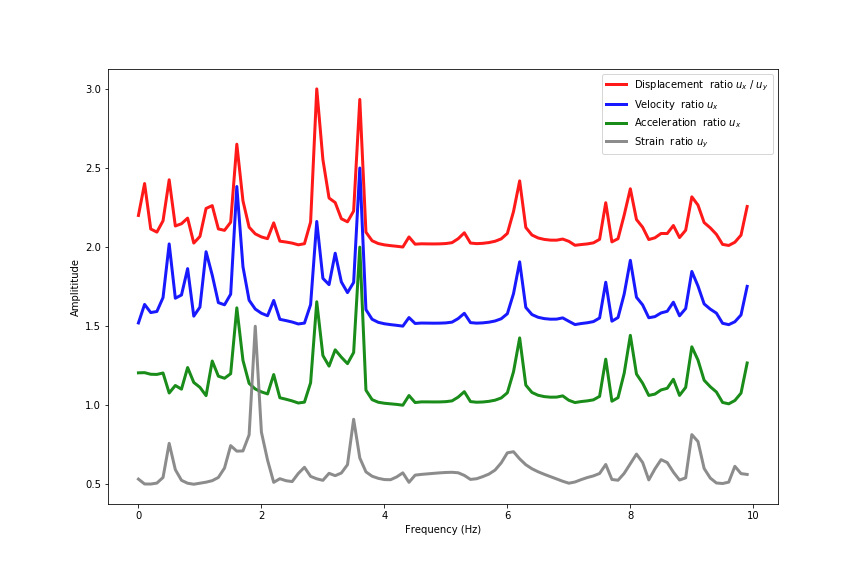

Text(0, 0.5, 'Amplititude')

In [12]:
plt.figure(figsize=(12,8)) 
l1,=plt.plot(freq[0:100],ratio_ux_uy_norm + 2.0,color="red",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
l2,=plt.plot(freq[0:100],ratio_vx_vy_norm + 1.5,color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
l3,=plt.plot(freq[0:100],ratio_vxt_vyt_norm + 1.0,color="green",linewidth=3.0,linestyle="-",alpha=0.9)
l4,=plt.plot(freq[0:100],ratio_uxx_uxy_norm + 0.5,color="grey",linewidth=3.0,linestyle="-",alpha=0.9)   #20s

# 设置legend
plt.legend(handles = [l1, l2, l3, l4,], labels = [r"Displacement  ratio $u_x$ / $u_y$" \
                                              , r"Velocity  ratio $ u_x $" \
                                              , r"Acceleration  ratio $ u_x $" \
                                              , r"Strain  ratio $ u_y $" ]\
                                                         
        , loc = 'best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplititude")
# plt.savefig('Top-Waveforms comparison spetral together for Delta stf.png')

In [13]:
uxy_f=np.real(ifft(ff_uxy))
uxx_f=np.real(ifft(ff_uxx))

vxt_f=np.real(ifft(ff_vxt))
vyt_f=np.real(ifft(ff_vyt))

vx_f=np.real(ifft(ff_vx))
vy_f=np.real(ifft(ff_vy))

print(np.shape(uxy_f))
print(np.shape(tt))

(855075,)
(855075,)


<IPython.core.display.Javascript object>


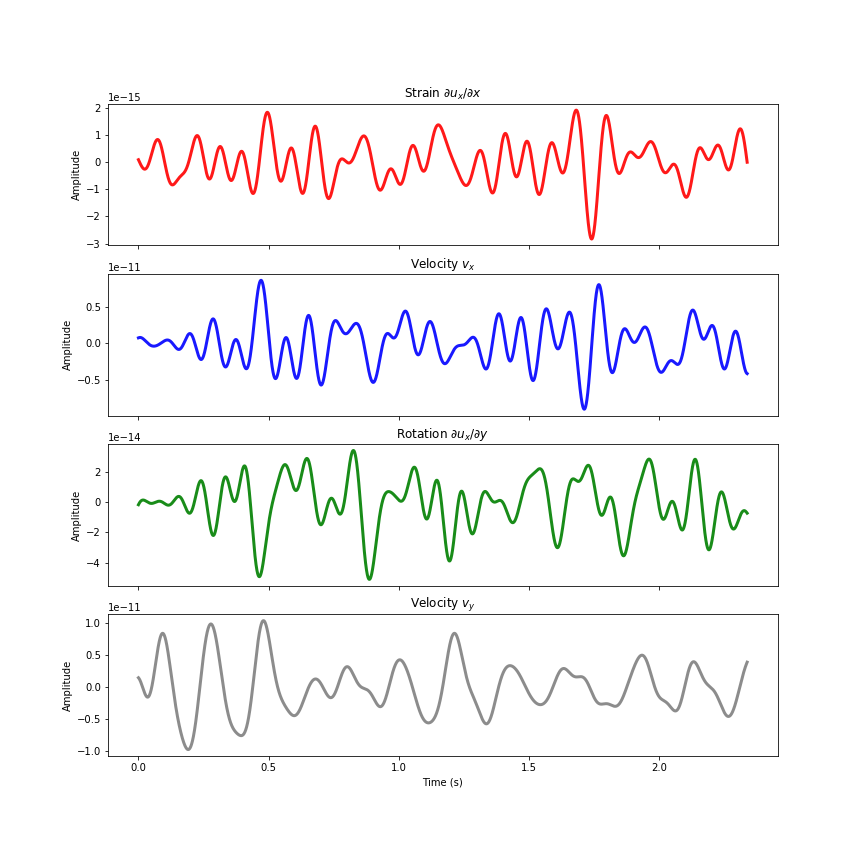

In [14]:
f, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot the different fields.

ax[0].plot(tt[0:200000],uxx_f[0:200000],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[1].plot(tt[0:200000],vx_f[0:200000],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(tt[0:200000],uxy_f[0:200000],color="green",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[3].plot(tt[0:200000],vy_f[0:200000],color="grey",linewidth=3.0,linestyle="-",alpha=0.9)

# Label plots

ax[0].set_title(r"Strain $\partial u_x / \partial x$")
ax[1].set_title(r"Velocity $v_x$")
ax[2].set_title(r"Rotation $\partial u_x / \partial y$")
ax[3].set_title(r"Velocity $v_y$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel("Time (s)")

plt.savefig('Top-waveforms comparison Rotation for Delta stf.png')

## Calculate the derivative of the rotation Ux/y

<IPython.core.display.Javascript object>


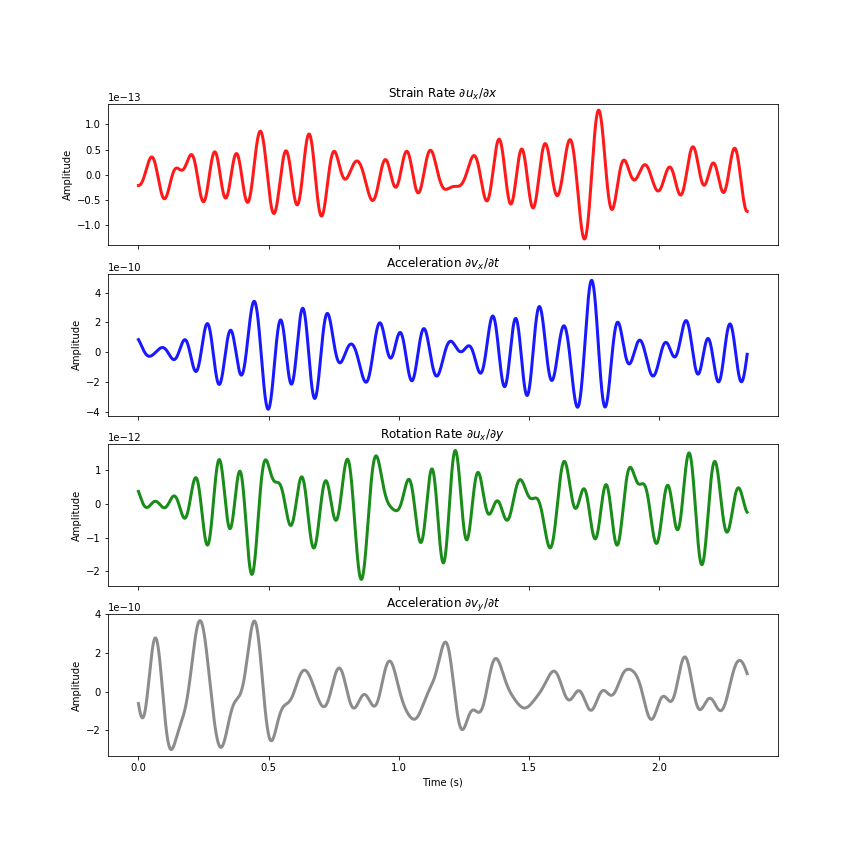

In [15]:
import numpy as np

uxy_t=np.diff(uxy_f[:])/dt
uxx_t=np.diff(uxx_f[:])/dt

f, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot the different fields.

ax[0].plot(tt[0:200000],uxx_t[0:200000],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[1].plot(tt[0:200000],vxt_f[0:200000],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(tt[0:200000],uxy_t[0:200000],color="green",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[3].plot(tt[0:200000],vyt_f[0:200000],color="grey",linewidth=3.0,linestyle="-",alpha=0.9)

# Label plots

ax[0].set_title(r"Strain Rate $\partial u_x / \partial x$")
ax[1].set_title(r"Acceleration $\partial v_x / \partial t$")
ax[2].set_title(r"Rotation Rate $\partial u_x / \partial y$")
ax[3].set_title(r"Acceleration $\partial v_y / \partial t$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel("Time (s)")
plt.savefig('Top-waveforms comparison rotation rate for Delta stf.png')

<IPython.core.display.Javascript object>


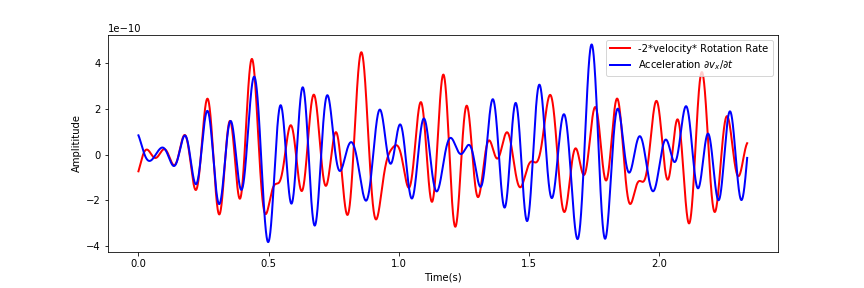

In [16]:
plt.figure(figsize=(12,4)) 
l1,=plt.plot(tt[0:200000],-uxy_t[0:200000]*200,label="$sin(x)$",color="red",linewidth=2)    # time direvetive of rotation
l2,=plt.plot(tt[0:200000],vxt_f[0:200000],label="$sin(x)$",color="blue",linewidth=2)    #acceleration
# 设置legend
plt.legend(handles = [l1, l2, ], labels = [r"-2*velocity* Rotation Rate", r"Acceleration $\partial v_x / \partial t$"], loc = 'best')
plt.xlabel("Time(s)")
plt.ylabel("Amplititude")

plt.savefig('Top-comparison of the rotation rate and the acceleration for Delta stf.png')